# Importing

In [1]:
import os
print("Current working dir:", os.getcwd())

import sys
import os

root_dir = os.path.abspath("..")
print("Adding to sys.path:", root_dir)
sys.path.insert(0, root_dir)  # Insert ensures priority

import importlib.util

api_path = os.path.join(root_dir, "LCBench", "api.py")
spec = importlib.util.spec_from_file_location("LCBench.api", api_path)
api = importlib.util.module_from_spec(spec)
spec.loader.exec_module(api)

Benchmark = api.Benchmark

os.makedirs("../LCBench/cached", exist_ok=True)
bench_dir = "../LCBench/cached/six_datasets_lw.json"
bench = Benchmark(bench_dir, cache=False)

Current working dir: /Users/qianxie/Desktop/Curriculum/Graduate/Research/CostAwareStoppingBayesOpt/notebooks
Adding to sys.path: /Users/qianxie/Desktop/Curriculum/Graduate/Research/CostAwareStoppingBayesOpt
==> Loading data...
==> No cached data found or cache set to False.
==> Reading json data...
==> Done.


# API exploration

### Queryable tags

Tags starting with "Train/" indicate metrics which are logged every epoch.

In [3]:
from pprint import pprint
queriable_tags = bench.get_queriable_tags()
pprint(queriable_tags)

['time',
 'epoch',
 'Train/loss',
 'Train/train_accuracy',
 'Train/val_accuracy',
 'Train/train_cross_entropy',
 'Train/val_cross_entropy',
 'Train/train_balanced_accuracy',
 'Train/val_balanced_accuracy',
 'Train/test_result',
 'Train/test_cross_entropy',
 'Train/test_balanced_accuracy',
 'Train/lr',
 'model_parameters',
 'final_train_cross_entropy',
 'final_train_accuracy',
 'final_train_balanced_accuracy',
 'final_val_cross_entropy',
 'final_val_accuracy',
 'final_val_balanced_accuracy',
 'final_test_cross_entropy',
 'final_test_accuracy',
 'final_test_balanced_accuracy',
 'OpenML_task_id',
 'test_split',
 'budget',
 'seed',
 'instances',
 'classes',
 'features',
 'batch_size',
 'imputation_strategy',
 'learning_rate_scheduler',
 'loss',
 'network',
 'max_dropout',
 'normalization_strategy',
 'optimizer',
 'cosine_annealing_T_max',
 'cosine_annealing_eta_min',
 'activation',
 'max_units',
 'mlp_shape',
 'num_layers',
 'learning_rate',
 'momentum',
 'weight_decay',
 'config']


### Datasets

In [4]:
dataset_names = bench.get_dataset_names()
openml_task_ids = bench.get_openml_task_ids()

print(dataset_names)
print(openml_task_ids)

['Fashion-MNIST', 'adult', 'higgs', 'jasmine', 'vehicle', 'volkert']
[189908, 126025, 167200, 189862, 167168, 168331]


### Querying

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

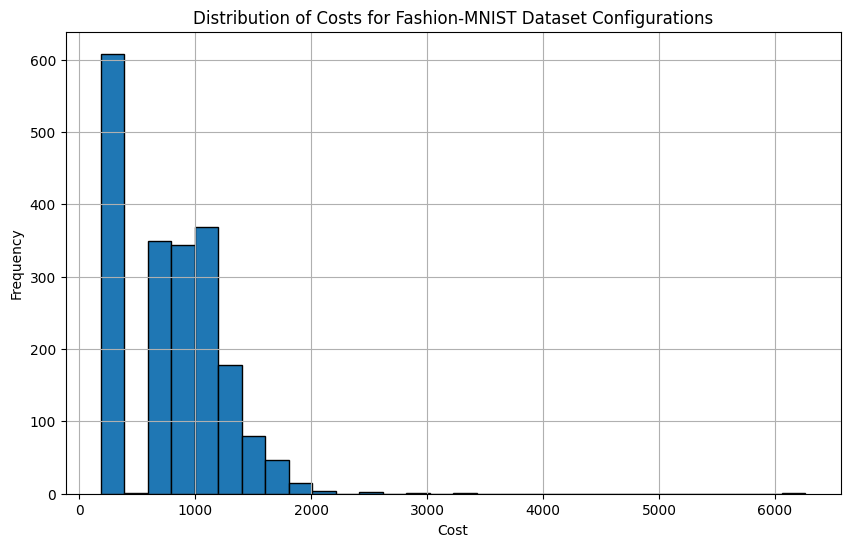

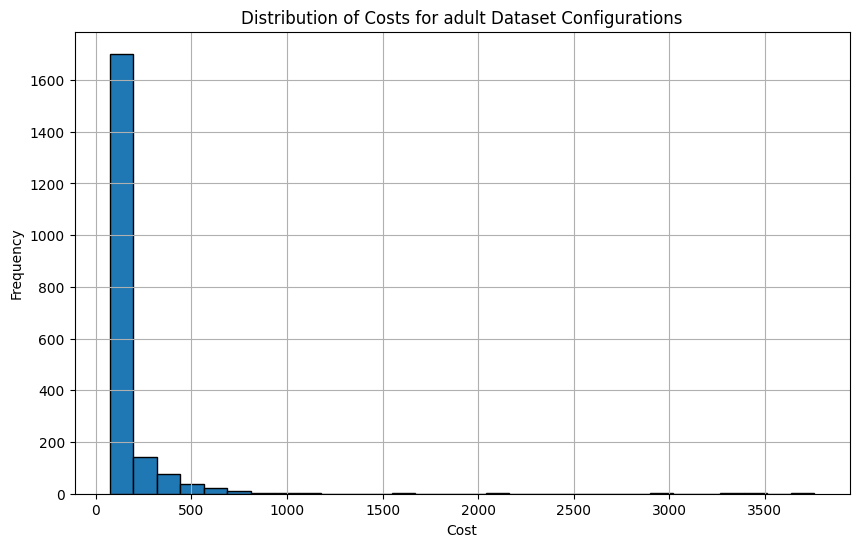

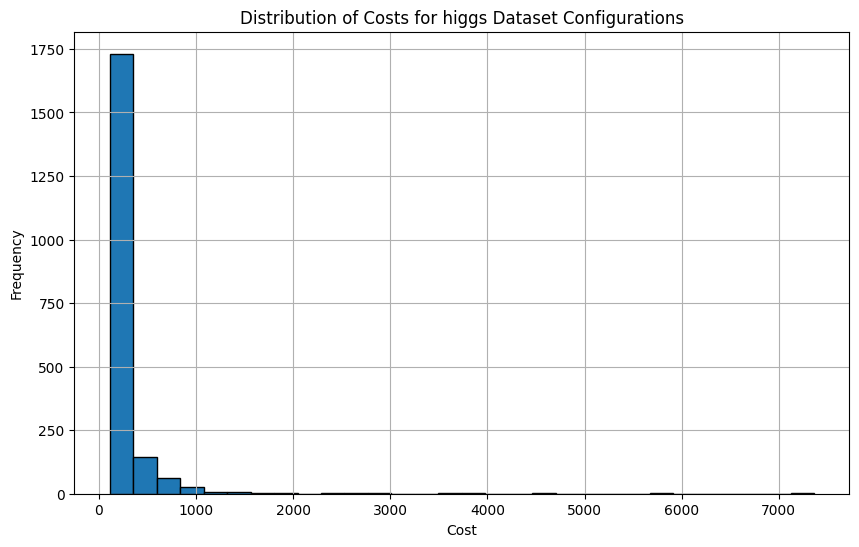

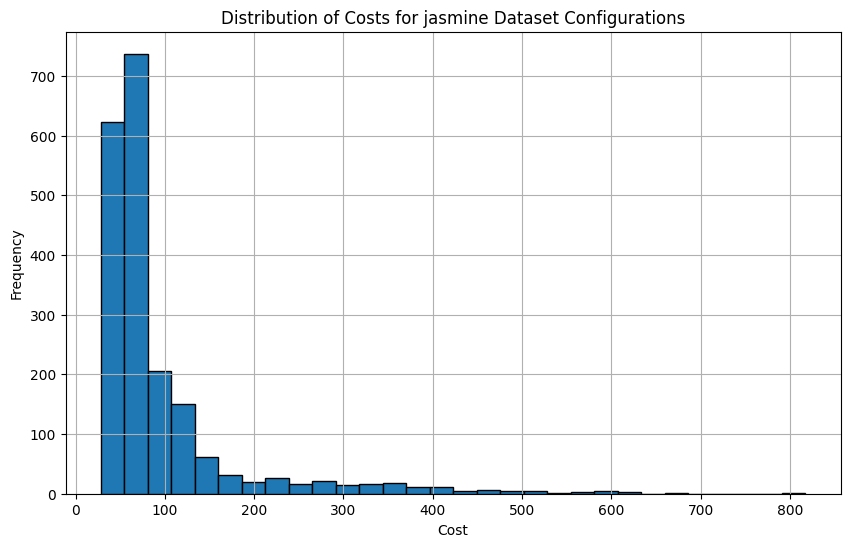

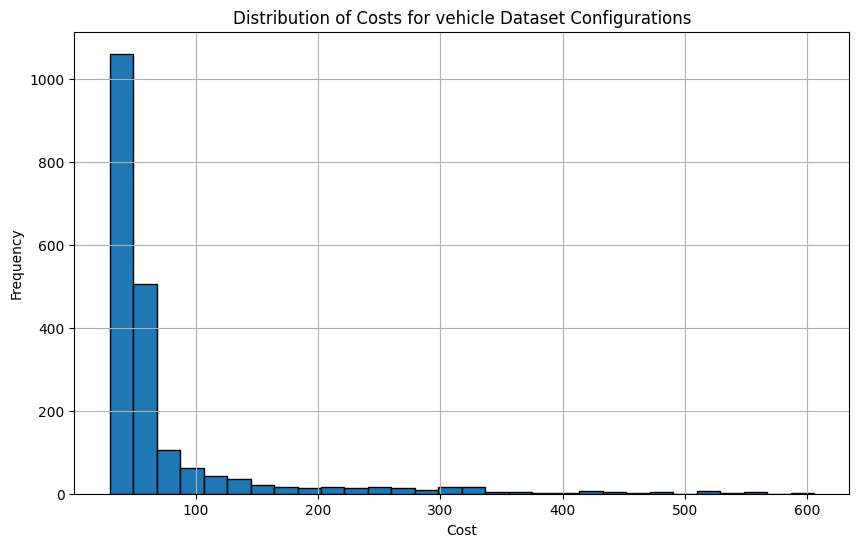

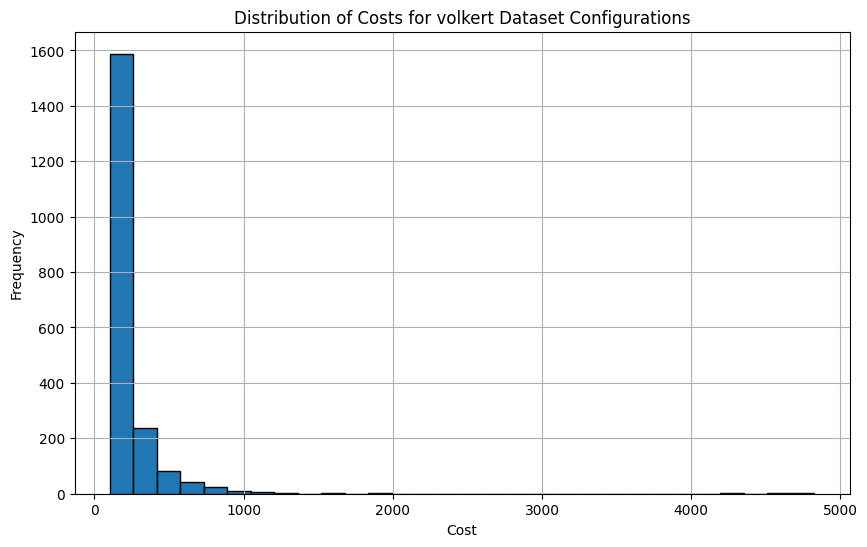

In [6]:
import matplotlib.pyplot as plt

# Set the number of configurations (adjust if needed)
num_configs = 2000

# Dictionary to store cost data for each dataset
cost_data = {}

# Loop through each dataset and collect cost data
for dataset in dataset_names:
    costs = []
    for i in range(num_configs):
        try:
            # Query for the cost value; assuming bench.query returns a list and the last element is the cost
            cost_value = bench.query(dataset_name=dataset, tag="time", config_id=i)[-1]
            costs.append(cost_value)
        except Exception as e:
            # Handle potential errors (e.g., missing config_id) if necessary
            print(f"Error retrieving cost for dataset '{dataset}', config {i}: {e}")
    cost_data[dataset] = costs

# Plot the cost distribution for each dataset
for dataset, costs in cost_data.items():
    plt.figure(figsize=(10, 6))
    plt.hist(costs, bins=30, edgecolor='black')
    plt.title(f'Distribution of Costs for {dataset} Dataset Configurations')
    plt.xlabel('Cost')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [60]:
bench.query(dataset_name="Fashion-MNIST", tag="config", config_id=1999)

{'batch_size': 57,
 'imputation_strategy': 'mean',
 'learning_rate_scheduler': 'cosine_annealing',
 'loss': 'cross_entropy_weighted',
 'network': 'shapedmlpnet',
 'max_dropout': 0.404549055549585,
 'normalization_strategy': 'standardize',
 'optimizer': 'sgd',
 'cosine_annealing_T_max': 50,
 'cosine_annealing_eta_min': 1e-08,
 'activation': 'relu',
 'max_units': 408,
 'mlp_shape': 'funnel',
 'num_layers': 4,
 'learning_rate': 0.09369657122908694,
 'momentum': 0.28168216579061095,
 'weight_decay': 0.05218621267283741}

In [16]:
best_acc = bench.query_best_final("Fashion-MNIST", "final_test_accuracy", "final_test_accuracy")
0.5*0.01*0.01*(100-best_acc)

0.0004913419913419915

In [20]:
best_acc = bench.query_best_final("higgs", "final_test_accuracy", "final_test_accuracy")
0.5*0.01*0.01*(100-best_acc)

0.0014068488070218812

In [18]:
best_acc = bench.query_best_final("adult", "final_test_accuracy", "final_test_accuracy")
0.5*0.01*0.01*(100-best_acc)

0.0008497238940249424

In [19]:
best_acc = bench.query_best_final("volkert", "final_test_accuracy", "final_test_accuracy")
0.5*0.01*0.01*(100-best_acc)

0.0018617159486566544

Slope for Fashion-MNIST: 0.0009
Slope for higgs: 0.0018
Slope for volkert: 0.0010


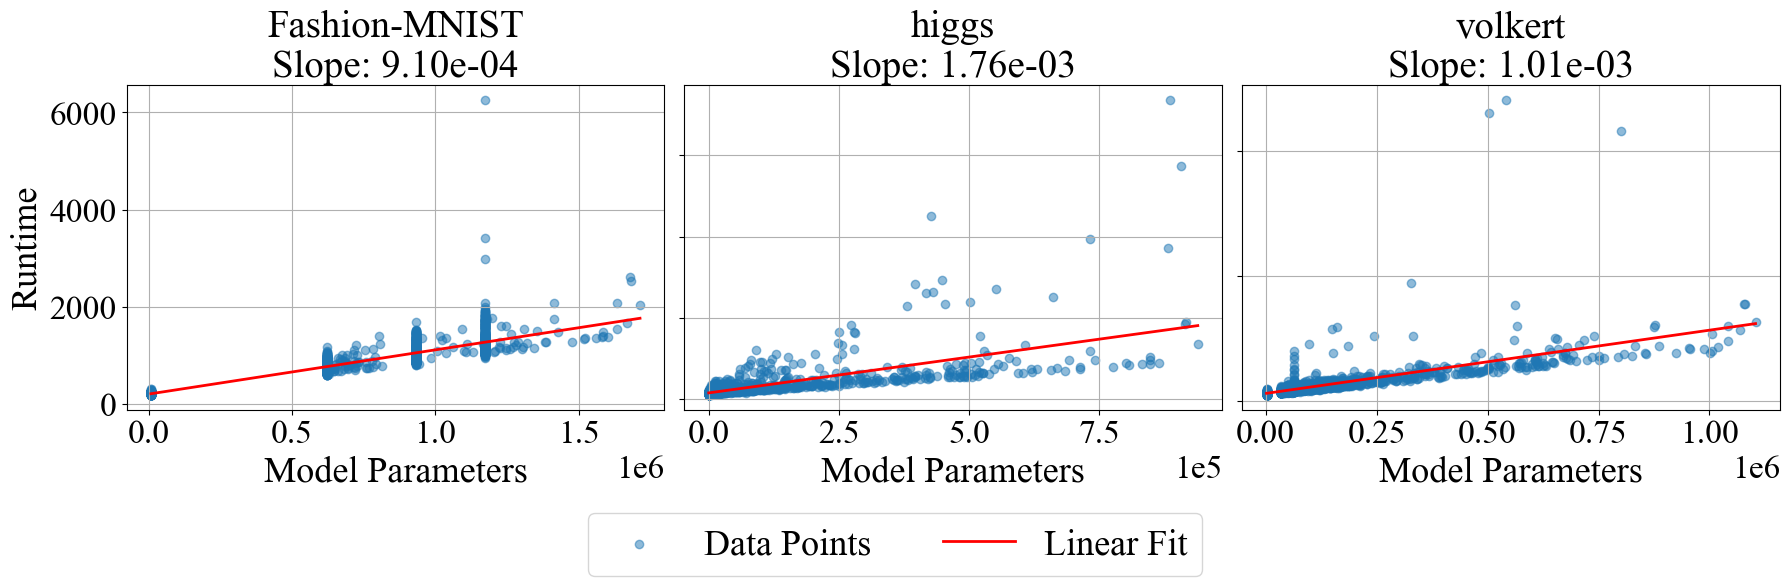

In [13]:
import numpy as np

dataset_names = ['Fashion-MNIST', 'higgs', 'volkert']  # Assumes there are exactly six datasets
num_configs = 2000  # Adjust based on available configurations

# Create a 1x3 grid of subplots for each dataset.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for i, (ax, dataset) in enumerate(zip(axes, dataset_names)):
    model_params_list = []  # Number of model parameters for each configuration
    time_vals = []          # Corresponding time (using the last time stamp)
    
    # Collect data
    for config_id in range(num_configs):
        try:
            params = bench.query(dataset_name=dataset, tag="model_parameters", config_id=config_id)
            time_val = bench.query(dataset_name=dataset, tag="time", config_id=config_id)[-1]
            model_params_list.append(params)
            time_vals.append(time_val)
        except Exception as e:
            print(f"Skipping config {config_id} for dataset {dataset}: {e}")
            continue
    
    ax.scatter(model_params_list, time_vals, alpha=0.5, label='Data Points')
    
    if len(model_params_list) > 1:
        # Fit linear regression
        coefficients = np.polyfit(model_params_list, time_vals, 1)
        slope, intercept = coefficients
        line_fit = np.poly1d(coefficients)
        
        # Plot the line
        x_range = np.linspace(min(model_params_list), max(model_params_list), 100)
        ax.plot(x_range, line_fit(x_range), color="red", linewidth=2, label='Linear Fit')
        
        # Print and display slope
        print(f"Slope for {dataset}: {slope:.4f}")
        ax.set_title(f"{dataset}\nSlope: {slope:.2e}", fontsize=28)
    else:
        ax.set_title(f"{dataset}\nInsufficient data", fontsize=28)

    if i == 0:
        ax.set_ylabel("Runtime", fontsize=26)
    else:
        ax.set_ylabel("")
        ax.tick_params(labelleft=False)
    ax.set_xlabel("Model Parameters", fontsize=26)
    ax.tick_params(axis='both', labelsize=24)
    ax.grid(True)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    ax.xaxis.get_offset_text().set_fontsize(24)

# plt.suptitle("Time vs Model Parameters with Linear Regression and Slopes", fontsize=)
# Get legend handles and labels from one of the axes
handles, labels = axes[0].get_legend_handles_labels()

# Place the legend below all subplots
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=26, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
# plt.show()
plt.savefig("../plots/runtime_proxy.pdf")

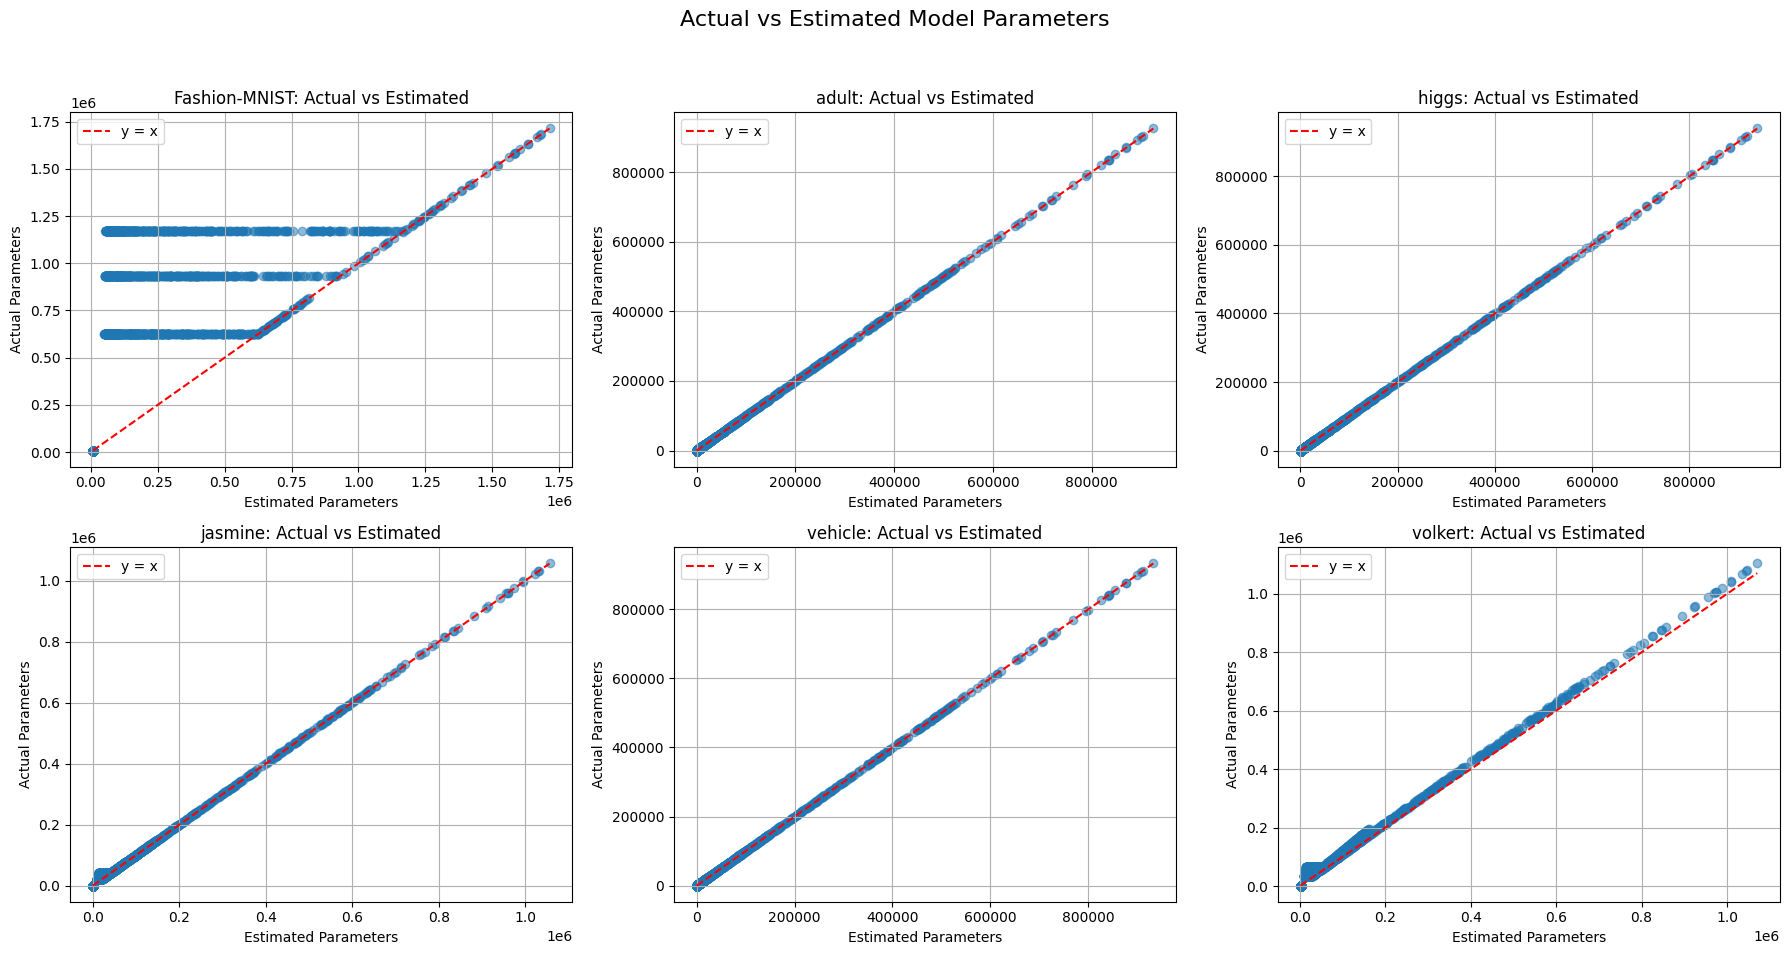

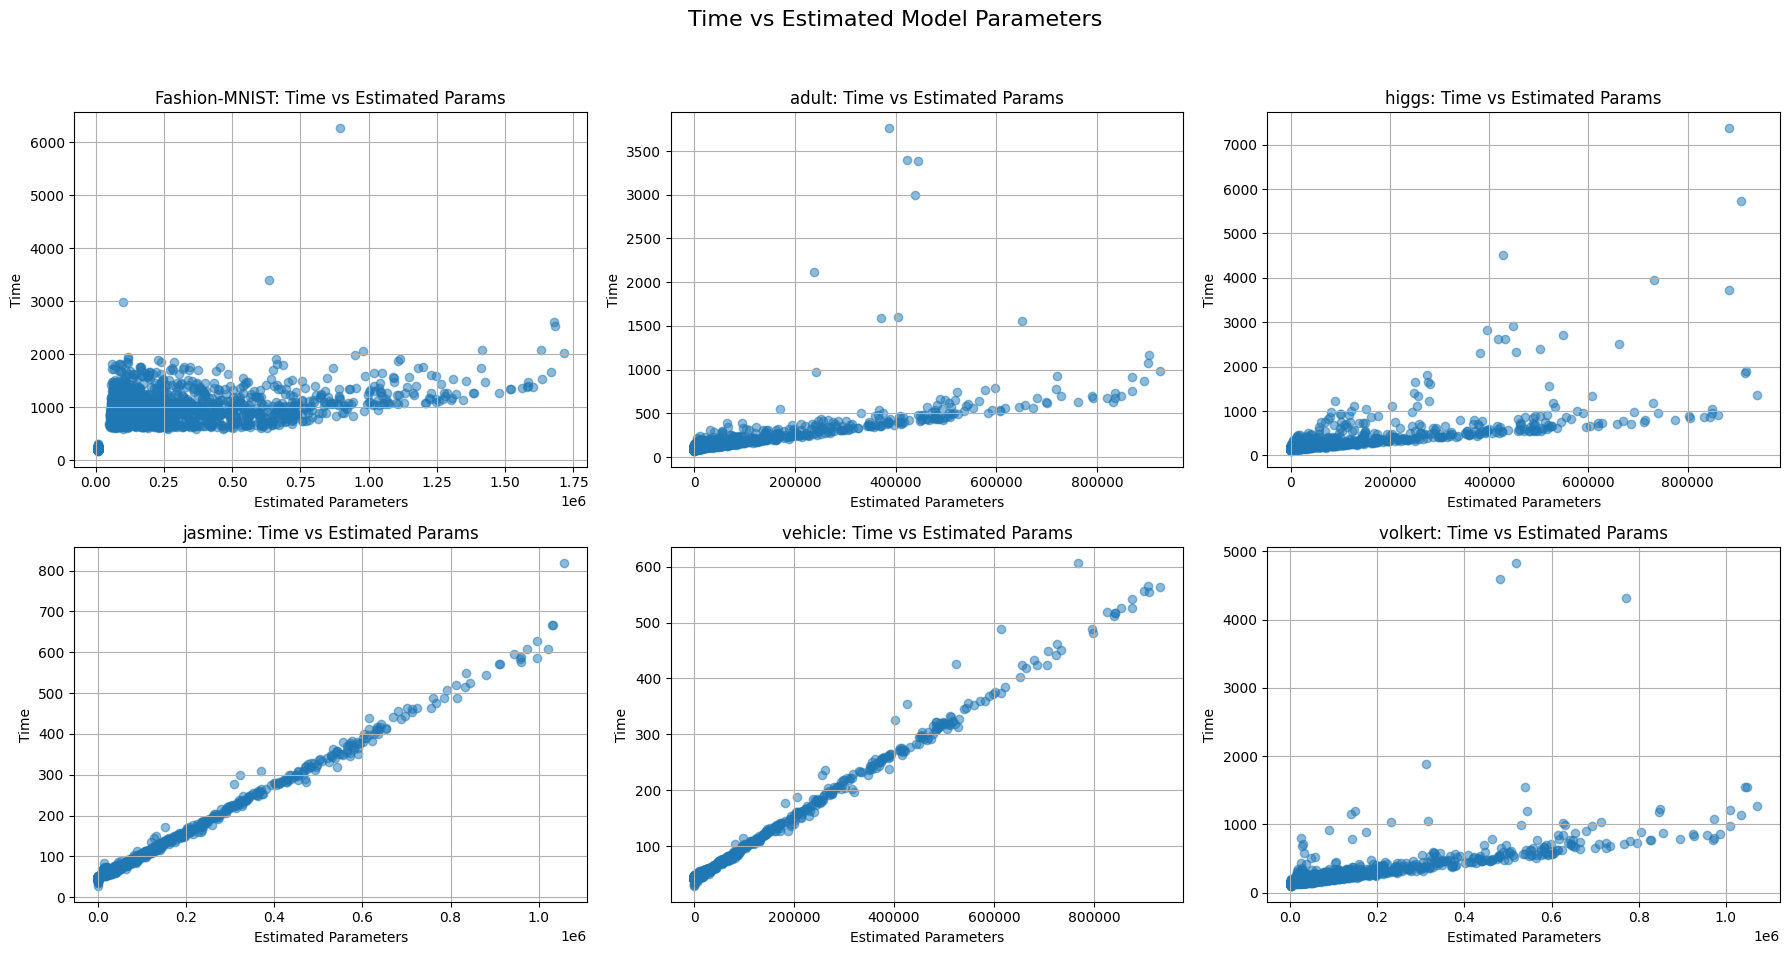

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def estimate_model_parameters(input_dim, output_feat, max_units, num_layers):
    if num_layers == 1:
        return input_dim * output_feat + output_feat

    step_size = (max_units - output_feat) // (num_layers - 1)
    layer_sizes = [max_units - i * step_size for i in range(num_layers - 1)]
    layer_sizes.append(output_feat)

    total_params = 0
    prev = input_dim
    for width in layer_sizes:
        total_params += prev * width  # weights
        total_params += width         # biases
        prev = width
    return total_params

# Known dataset properties
dataset_info = {
    'Fashion-MNIST': {'input_dim': 784, 'output_feat': 10},
    'adult': {'input_dim': 14, 'output_feat': 1},
    'higgs': {'input_dim': 28, 'output_feat': 1},
    'jasmine': {'input_dim': 144, 'output_feat': 1},
    'vehicle': {'input_dim': 18, 'output_feat': 4},
    'volkert': {'input_dim': 147, 'output_feat': 10},
}

dataset_names = list(dataset_info.keys())
num_configs = 2000  # Adjust based on availability

# Setup subplots: 2 rows (actual vs est, and time vs est), 3 cols
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 10))
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
axes1 = axes1.flatten()
axes2 = axes2.flatten()

for i, dataset in enumerate(dataset_names):
    input_dim = dataset_info[dataset]['input_dim']
    output_feat = dataset_info[dataset]['output_feat']
    
    actual_params = []
    estimated_params = []
    times = []

    for config_id in range(num_configs):
        try:
            config = bench.query(dataset_name=dataset, tag="config", config_id=config_id)
            num_layers = int(config["num_layers"])
            max_units = int(config["max_units"])

            # Estimate parameters
            est = estimate_model_parameters(input_dim, output_feat, max_units, num_layers)

            # Get actual parameters and time
            actual = bench.query(dataset_name=dataset, tag="model_parameters", config_id=config_id)
            time_val = bench.query(dataset_name=dataset, tag="time", config_id=config_id)[-1]

            actual_params.append(actual)
            estimated_params.append(est)
            times.append(time_val)

        except Exception as e:
            print(f"Skipping config {config_id} for {dataset}: {e}")

    # Subplot 1: Actual vs Estimated model parameters
    ax1 = axes1[i]
    ax1.scatter(estimated_params, actual_params, alpha=0.5)
    ax1.plot([min(estimated_params), max(estimated_params)],
             [min(estimated_params), max(estimated_params)], color='red', linestyle='--', label="y = x")
    ax1.set_xlabel("Estimated Parameters")
    ax1.set_ylabel("Actual Parameters")
    ax1.set_title(f"{dataset}: Actual vs Estimated")
    ax1.grid(True)
    ax1.legend()

    # Subplot 2: Time vs Estimated Parameters
    ax2 = axes2[i]
    ax2.scatter(estimated_params, times, alpha=0.5)
    ax2.set_xlabel("Estimated Parameters")
    ax2.set_ylabel("Time")
    ax2.set_title(f"{dataset}: Time vs Estimated Params")
    ax2.grid(True)

fig1.suptitle("Actual vs Estimated Model Parameters", fontsize=16)
fig2.suptitle("Time vs Estimated Model Parameters", fontsize=16)
fig1.tight_layout(rect=[0, 0.03, 1, 0.95])
fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()